In [6]:
#Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [7]:
#Load the dataset
data = pd.read_csv('airline-passengers.csv', usecols=[1]).values.astype('float32')

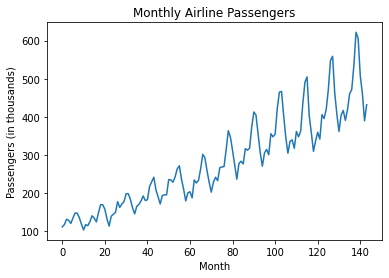

In [8]:
# Plot the time series
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers (in thousands)')
plt.show()

From the plot generated in part (a), we can observe both short-term and long-term temporal patterns in the data.

- Short-term temporal patterns:

We can observe that the number of airline passengers shows seasonality, with a repeating pattern that occurs within a year. Specifically, we can see that there is a peak in the summer months (around July-August) and a dip in the winter months (around January-February). This indicates that the number of airline passengers varies with the season.
Additionally, we can see that there is some variation around the trend line, with some months having more passengers than expected (above the trend line) and some months having fewer passengers than expected (below the trend line). This variation may be due to factors such as holidays, events, or weather conditions that affect people's travel plans.

- Long-term temporal patterns:

We can see that the overall trend of the data is upward, indicating that the number of airline passengers has been increasing over time. This suggests that there has been growth in the airline industry, with more people traveling by air over the years.
There are also some notable deviations from the trend, such as a dip in the mid-1950s, a plateau in the mid-1960s, and a slowdown in the early 1970s. These deviations may be due to factors such as economic conditions, changes in airline industry regulations, or other external events that affect travel behavior.
Overall, the short-term and long-term temporal patterns in the data suggest that the number of airline passengers is affected by both seasonal and long-term factors, and that there is variability in the data that may be due to a range of internal and external factors.

In [9]:
# Normalize the data to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [10]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [11]:
# Create the input-output dataset for LSTM
def create_dataset(data):
    dataX, dataY = [], []
    for i in range(len(data)-1):
        dataX.append(data[i])
        dataY.append(data[i+1])
    return np.array(dataX), np.array(dataY)

In [12]:
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

In [14]:
# Reshape the input data to be in the [samples, time steps, features] format
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
# Build the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1), activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
95/95 - 1s - loss: 0.0223 - 824ms/epoch - 9ms/step
Epoch 2/100
95/95 - 0s - loss: 0.0210 - 109ms/epoch - 1ms/step
Epoch 3/100
95/95 - 0s - loss: 0.0205 - 113ms/epoch - 1ms/step
Epoch 4/100
95/95 - 0s - loss: 0.0202 - 130ms/epoch - 1ms/step
Epoch 5/100
95/95 - 0s - loss: 0.0199 - 134ms/epoch - 1ms/step
Epoch 6/100
95/95 - 0s - loss: 0.0199 - 135ms/epoch - 1ms/step
Epoch 7/100
95/95 - 0s - loss: 0.0196 - 133ms/epoch - 1ms/step
Epoch 8/100
95/95 - 0s - loss: 0.0194 - 121ms/epoch - 1ms/step
Epoch 9/100
95/95 - 0s - loss: 0.0191 - 140ms/epoch - 1ms/step
Epoch 10/100
95/95 - 0s - loss: 0.0190 - 139ms/epoch - 1ms/step
Epoch 11/100
95/95 - 0s - loss: 0.0187 - 130ms/epoch - 1ms/step
Epoch 12/100
95/95 - 0s - loss: 0.0186 - 114ms/epoch - 1ms/step
Epoch 13/100
95/95 - 0s - loss: 0.0183 - 128ms/epoch - 1ms/step
Epoch 14/100
95/95 - 0s - loss: 0.0179 - 164ms/epoch - 2ms/step
Epoch 15/100
95/95 - 0s - loss: 0.0178 - 142ms/epoch - 1ms/step
Epoch 16/100
95/95 - 0s - loss: 0.0175 - 138ms/ep

In [16]:
# Make predictions on the training and testing data
trainPredict = scaler.inverse_transform(model.predict(trainX))
testPredict = scaler.inverse_transform(model.predict(testX))

2/2 [==============================] - 0s 3ms/step


In [17]:
# Calculate the root-mean-squared-error (RMSE)
trainScore = np.sqrt(np.mean(np.square(trainY - trainPredict)))
testScore = np.sqrt(np.mean(np.square(testY - testPredict)))
print('Train RMSE: %.2f' % (trainScore))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 221.96
Test RMSE: 386.51


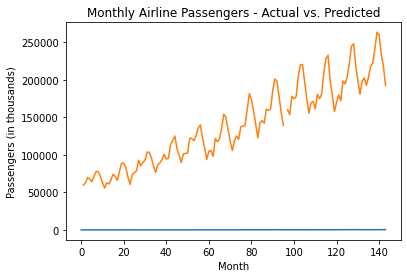

In [18]:
# Align and plot the actual and predicted values for the entire dataset
dataPredict = np.empty_like(data)
dataPredict[:, :] = np.nan
dataPredict[1:len(trainPredict)+1, :] = trainPredict
dataPredict[len(trainPredict)+2:len(dataPredict), :] = testPredict
data = scaler.inverse_transform(data)
dataPredict = scaler.inverse_transform(dataPredict)
plt.plot(data)
plt.plot(dataPredict)
plt.title('Monthly Airline Passengers - Actual vs. Predicted')
plt.xlabel('Month')
plt.ylabel('Passengers (in thousands)')
plt.show()